# Exploratory Data Analysis

The notebook is intended to:
 -To explore the dataset to uncover patterns, 
- identify data quality issues, and 
- form hypotheses that will guide your feature engineering.
This notebook is for exploration only; it is not for production code. 


## 1. Overview of the Data:
Understanding the structure of the dataset, including the number of rows, columns, and data types.

In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/raw/data.csv", parse_dates=['TransactionStartTime'])

# Structure analysis
data_overview = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Missing Values': df.isna().sum(),
    'Missing %': round(df.isna().mean() * 100, 2),
    
})
rows, columns = df.shape
print("="*80)
print('\t\t\t\tDATA STRUCTURE OVERVIEW')
print("="*80)
display(data_overview)
print(f"\nTotal Records: {rows} records with {columns} features")
print(f"Time Period: {df['TransactionStartTime'].dt.date.min()} to {df['TransactionStartTime'].dt.date.max()}")


				DATA STRUCTURE OVERVIEW


,Feature,Data Type,Unique Values,Missing Values,Missing %
TransactionId,TransactionId,object,95662,0,0.0
BatchId,BatchId,object,94809,0,0.0
AccountId,AccountId,object,3633,0,0.0
SubscriptionId,SubscriptionId,object,3627,0,0.0
CustomerId,CustomerId,object,3742,0,0.0
CurrencyCode,CurrencyCode,object,1,0,0.0
CountryCode,CountryCode,int64,1,0,0.0
ProviderId,ProviderId,object,6,0,0.0
ProductId,ProductId,object,23,0,0.0
ProductCategory,ProductCategory,object,9,0,0.0



Total Records: 95662 records with 16 features
Time Period: 2018-11-15 to 2019-02-13


## 2. Summary Statistics
Understanding the central tendency, dispersion, and shape of the dataset’s distribution.

In [5]:
# Numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_stats = df[num_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

# Add distribution metrics
num_stats.loc['skewness'] = df[num_cols].skew()
num_stats.loc['kurtosis'] = df[num_cols].kurtosis()

# Round numerical statistics to 2 decimal places
num_stats = num_stats.round(2)

# Categorical features
cat_cols = df.select_dtypes(exclude=[np.number, 'datetime']).columns
cat_stats = pd.concat([
    df[cat_cols].nunique().rename('Unique Categories'),
    df[cat_cols].isna().sum().rename('Missing Values'),
    (df[cat_cols].isna().mean() * 100).rename('Missing %'),
    df[cat_cols].mode().iloc[0].rename('Most Common Category'),
    (df[cat_cols].apply(lambda x: x.value_counts(dropna=False).iloc[0] / len(x) * 100).rename('Top Cat %'))
], axis=1)

# Round percentage columns in cat_stats to 2 decimal places
if 'Missing %' in cat_stats.columns:
    cat_stats['Missing %'] = cat_stats['Missing %'].round(2)
if 'Top Cat %' in cat_stats.columns:
    cat_stats['Top Cat %'] = cat_stats['Top Cat %'].round(2)

# Display output
print("\n" + "="*80)
print("\t\t\t\tNUMERICAL FEATURE STATISTICS")
print("="*80)
display(num_stats)

print("\n" + "="*80)
print("\t\t\t\tCATEGORICAL FEATURE STATISTICS")
print("="*80)
display(cat_stats)



				NUMERICAL FEATURE STATISTICS


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,95662.00,95662.00,95662.00,95662.00
mean,256.0,6717.85,9900.58,2.26,0.00
std,0.0,123306.80,123122.09,0.73,0.04
min,256.0,-1000000.00,2.00,0.00,0.00
1%,256.0,-30000.00,10.00,1.00,0.00
5%,256.0,-5000.00,25.00,2.00,0.00
25%,256.0,-50.00,275.00,2.00,0.00
50%,256.0,1000.00,1000.00,2.00,0.00
75%,256.0,2800.00,5000.00,2.00,0.00
95%,256.0,14500.00,25000.00,4.00,0.00



				CATEGORICAL FEATURE STATISTICS


,Unique Categories,Missing Values,Missing %,Most Common Category,Top Cat %
TransactionId,95662,0,0.0,TransactionId_1,0.00
BatchId,94809,0,0.0,BatchId_67019,0.03
AccountId,3633,0,0.0,AccountId_4841,32.29
SubscriptionId,3627,0,0.0,SubscriptionId_3829,34.11
CustomerId,3742,0,0.0,CustomerId_7343,4.28
CurrencyCode,1,0,0.0,UGX,100.00
ProviderId,6,0,0.0,ProviderId_4,39.92
ProductId,23,0,0.0,ProductId_6,34.11
ProductCategory,9,0,0.0,financial_services,47.46
ChannelId,4,0,0.0,ChannelId_3,59.52


## 3. Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


DISTRIBUTION OF NUMERICAL FEATURES
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


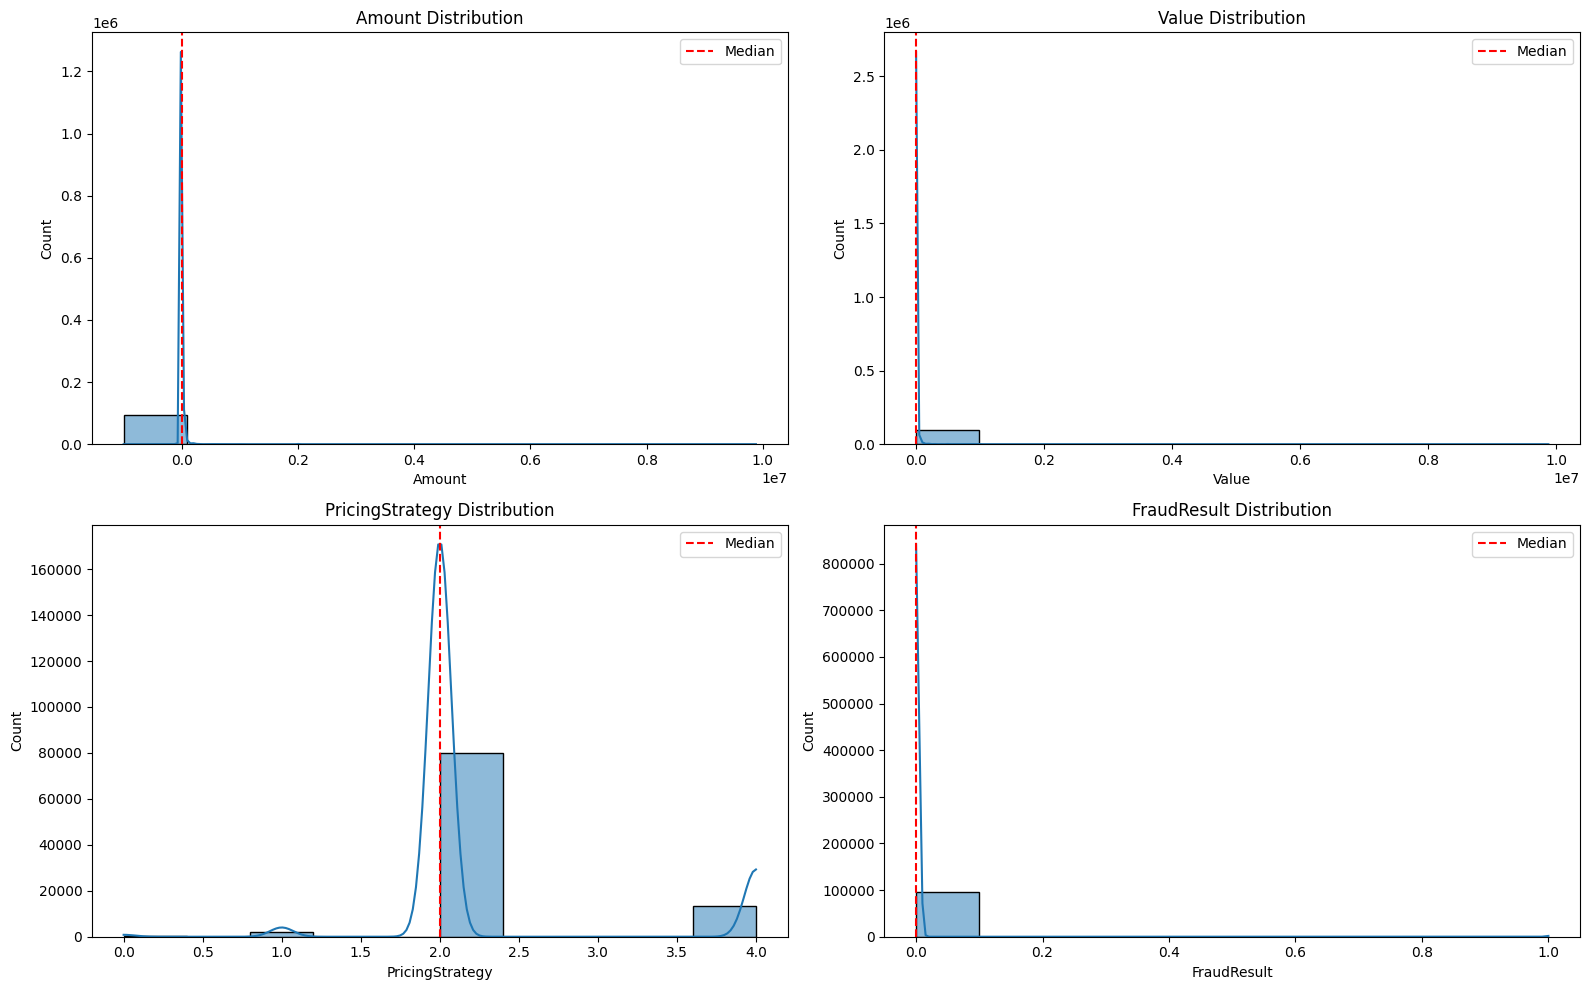

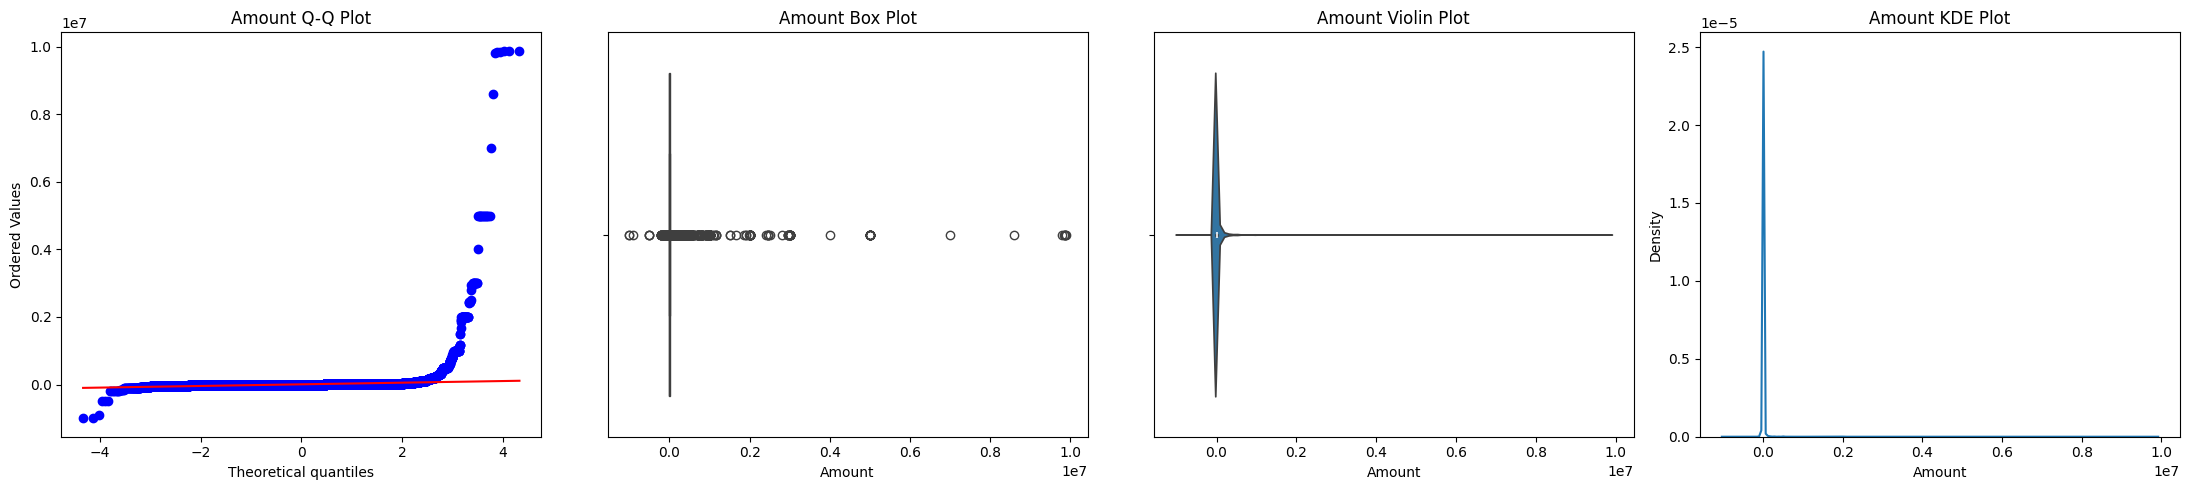

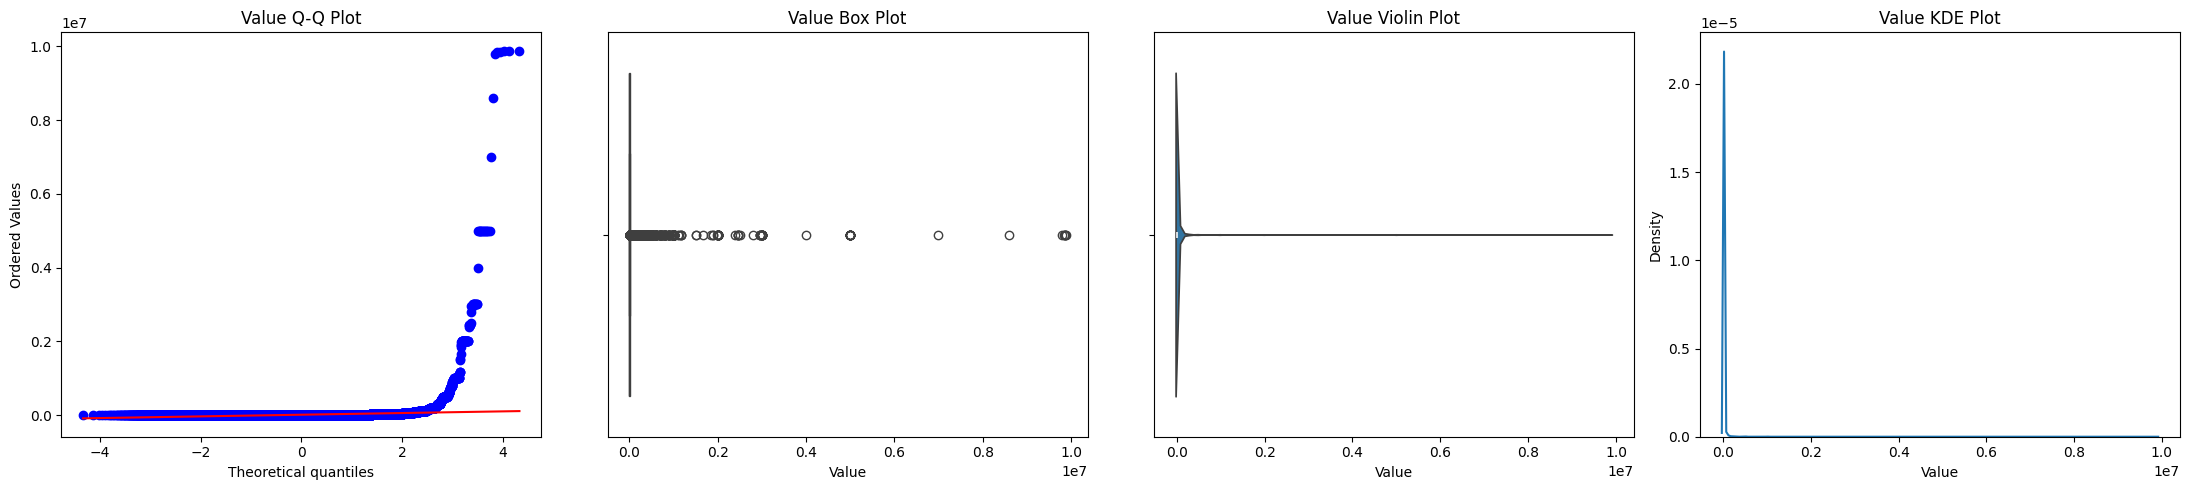

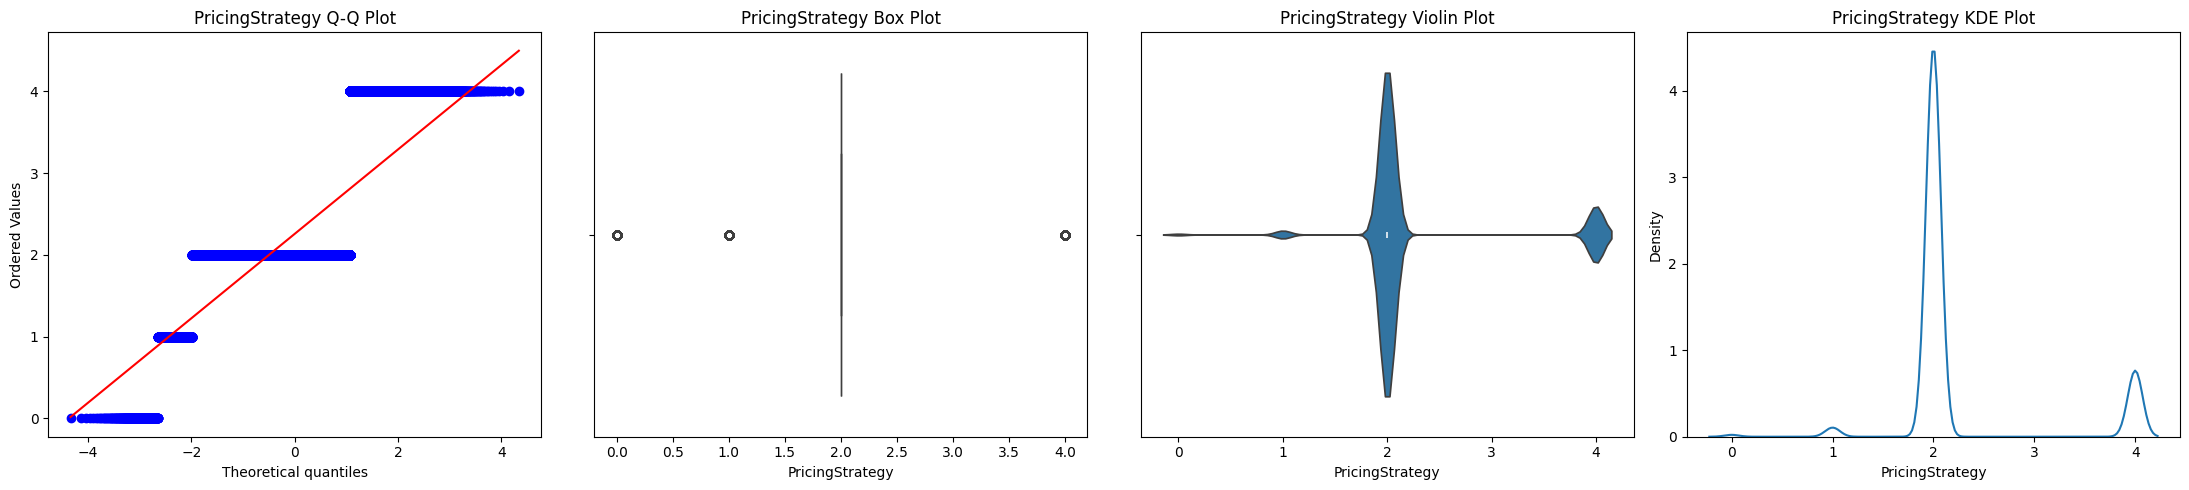

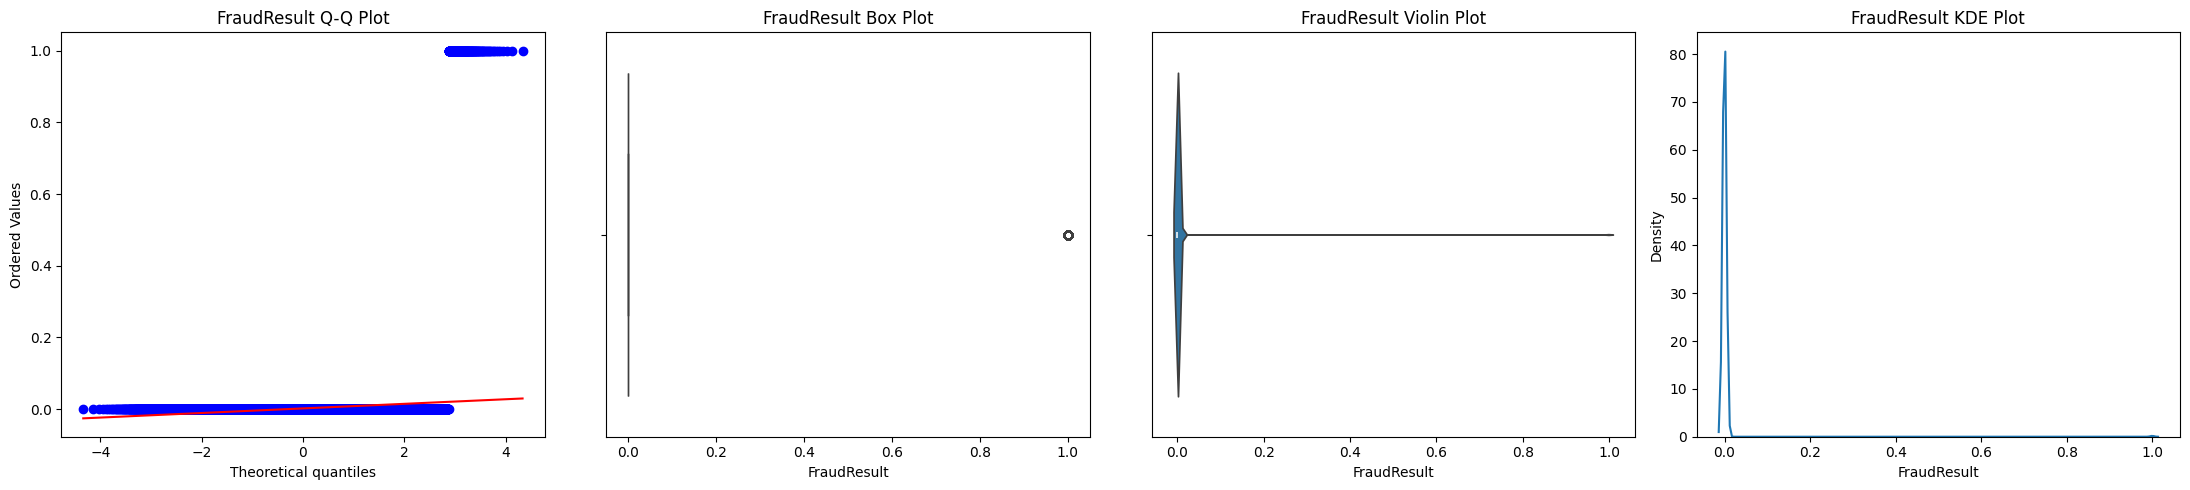

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np

# Section title
print("\n" + "="*80)
print("DISTRIBUTION OF NUMERICAL FEATURES")
print("Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.")
print("="*80)

# Select numerical columns and exclude 'CountryCode' 
num_cols = df.select_dtypes(include='number').columns
num_cols = [col for col in num_cols if col != 'CountryCode']

# Plot histograms with KDE for all numerical features
n_cols = 2  # Columns per row in the subplot grid
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f'{col} Distribution')
    axes[i].axvline(df[col].median(), color='r', linestyle='--', label='Median')
    axes[i].legend()

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Additional visualizations: Q-Q, Box, Violin, Histogram for each numerical feature
for col in num_cols:
    fig, axes = plt.subplots(1, 4, figsize=(22, 5))

    # Q-Q Plot
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[0])
    axes[0].set_title(f'{col} Q-Q Plot')

    # Box Plot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'{col} Box Plot')

    # Violin Plot
    sns.violinplot(x=df[col], ax=axes[2])
    axes[2].set_title(f'{col} Violin Plot')

    # KDE plot
    sns.kdeplot(x=df[col], ax=axes[3])
    axes[3].set_title(f'{col} KDE Plot')

    plt.tight_layout()
    plt.show()

Interactive illustration

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np
from ipywidgets import interact, IntSlider, Dropdown
import ipywidgets as widgets

# Section title
print("\n" + "="*80)
print("INTERACTIVE DISTRIBUTION OF NUMERICAL FEATURES")
print("Use the slider to adjust bins and dropdown to select a feature.")
print("="*80)

# Select numerical columns and exclude 'CountryCode' 
num_cols = df.select_dtypes(include='number').columns
num_cols = [col for col in num_cols if col != 'CountryCode']

# Interactive function
def plot_feature_distribution(column, bins):
    fig, axes = plt.subplots(1, 4, figsize=(22, 5))

    # Histogram
    sns.histplot(df[column], kde=False, ax=axes[0], bins=bins)
    axes[0].set_title(f'{column} Histogram ({bins} bins)')
    axes[0].axvline(df[column].median(), color='r', linestyle='--', label='Median')
    axes[0].legend()

    # Q-Q Plot
    stats.probplot(df[column].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'{column} Q-Q Plot')

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[2])
    axes[2].set_title(f'{column} Box Plot')

    # KDE Plot
    sns.kdeplot(x=df[column], ax=axes[3])
    axes[3].set_title(f'{column} KDE Plot')

    plt.tight_layout()
    plt.show()

# Create interactive widgets
interact(
    plot_feature_distribution,
    column=Dropdown(options=num_cols, description='Feature:'),
    bins=IntSlider(value=10, min=5, max=50, step=5, description='Bins:')
)



INTERACTIVE DISTRIBUTION OF NUMERICAL FEATURES
Use the slider to adjust bins and dropdown to select a feature.


interactive(children=(Dropdown(description='Feature:', options=('Amount', 'Value', 'PricingStrategy', 'FraudRe…

<function __main__.plot_feature_distribution(column, bins)>

## 4. Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

C:\Users\estiphanos.h\AppData\Local\Temp\ipykernel_14536\3279792038.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.values, y=top_cats.index, ax=axes[0], palette='viridis')


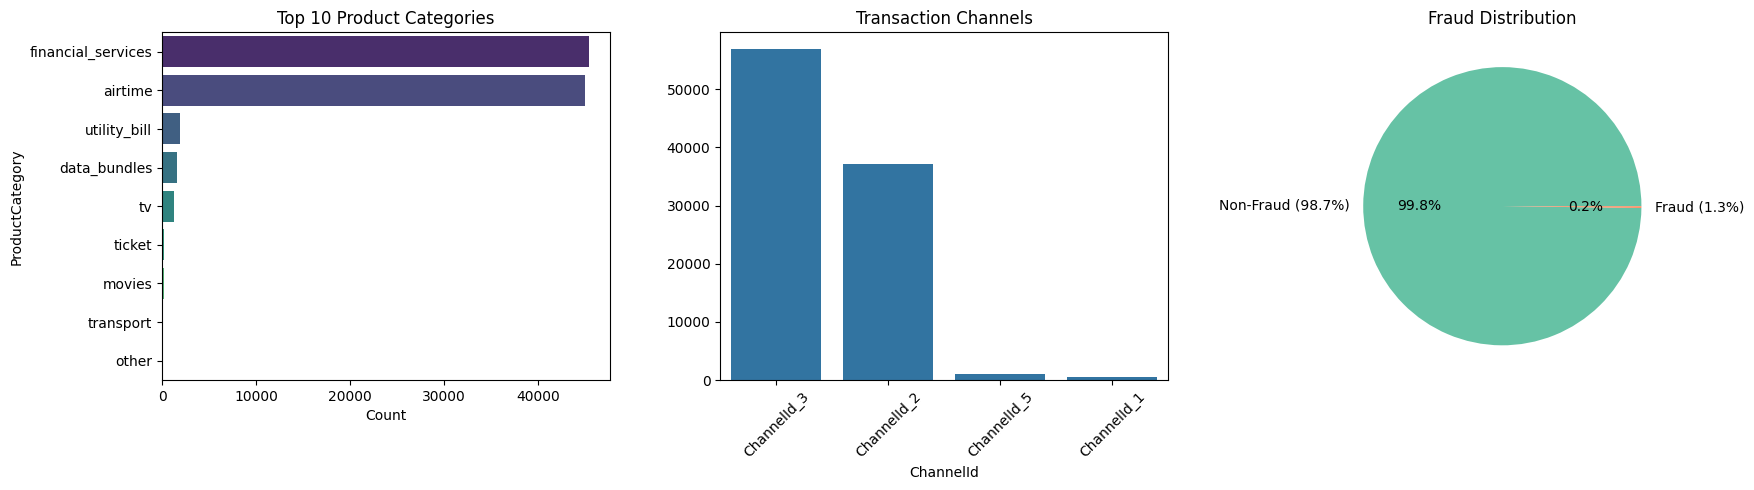

In [8]:
# ...existing code...

# Example for 3 categorical plots (adjust ncols if you add/remove plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Product category distribution (top 10)
top_cats = df['ProductCategory'].value_counts().nlargest(10)
sns.barplot(x=top_cats.values, y=top_cats.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Product Categories')
axes[0].set_xlabel('Count')

# Channel distribution
channel_counts = df['ChannelId'].value_counts()
sns.barplot(x=channel_counts.index, y=channel_counts.values, ax=axes[1])
axes[1].set_title('Transaction Channels')
axes[1].tick_params(axis='x', rotation=45)

# Fraud distribution
fraud_counts = df['FraudResult'].value_counts()
axes[2].pie(fraud_counts, labels=['Non-Fraud (98.7%)', 'Fraud (1.3%)'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
axes[2].set_title('Fraud Distribution')

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
Understanding the relationship between numerical features.

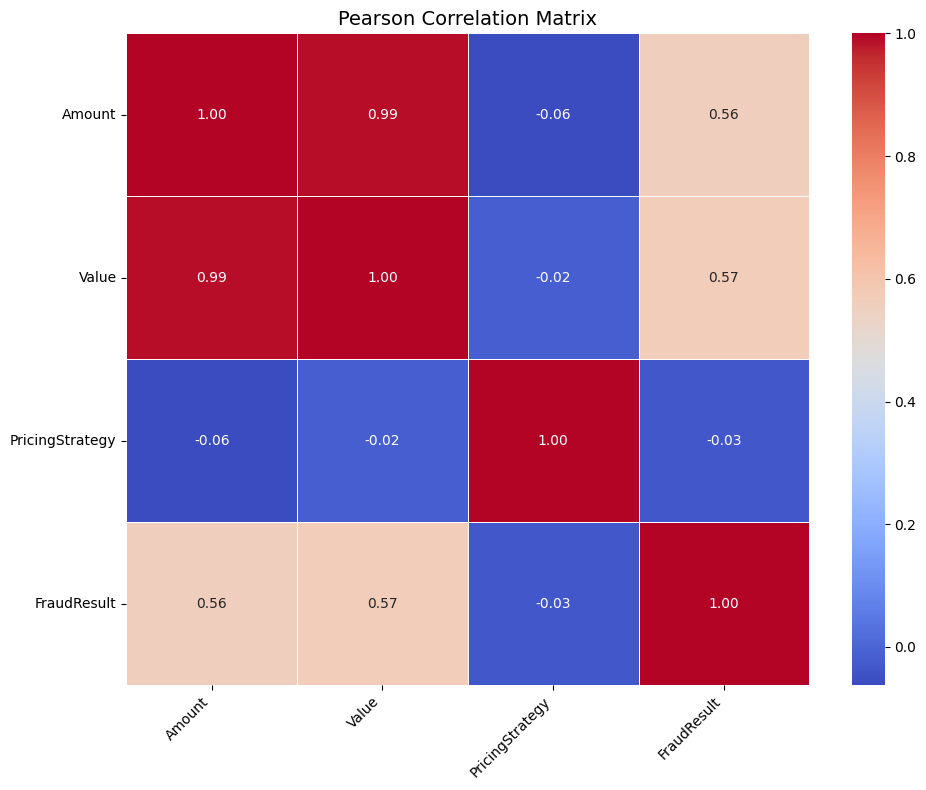

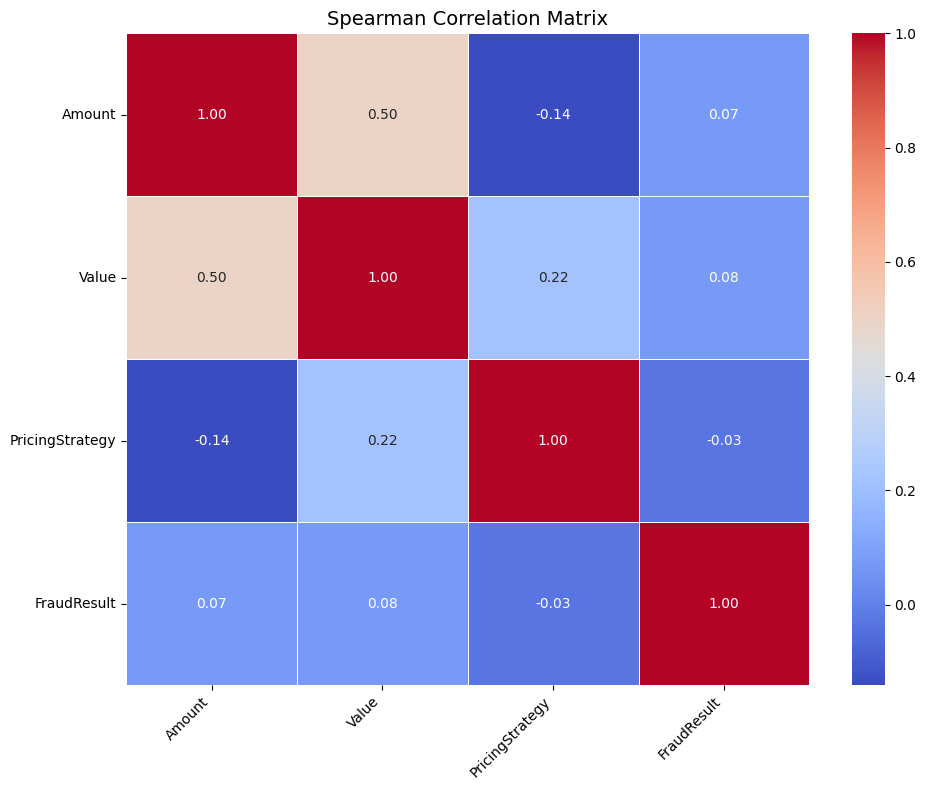

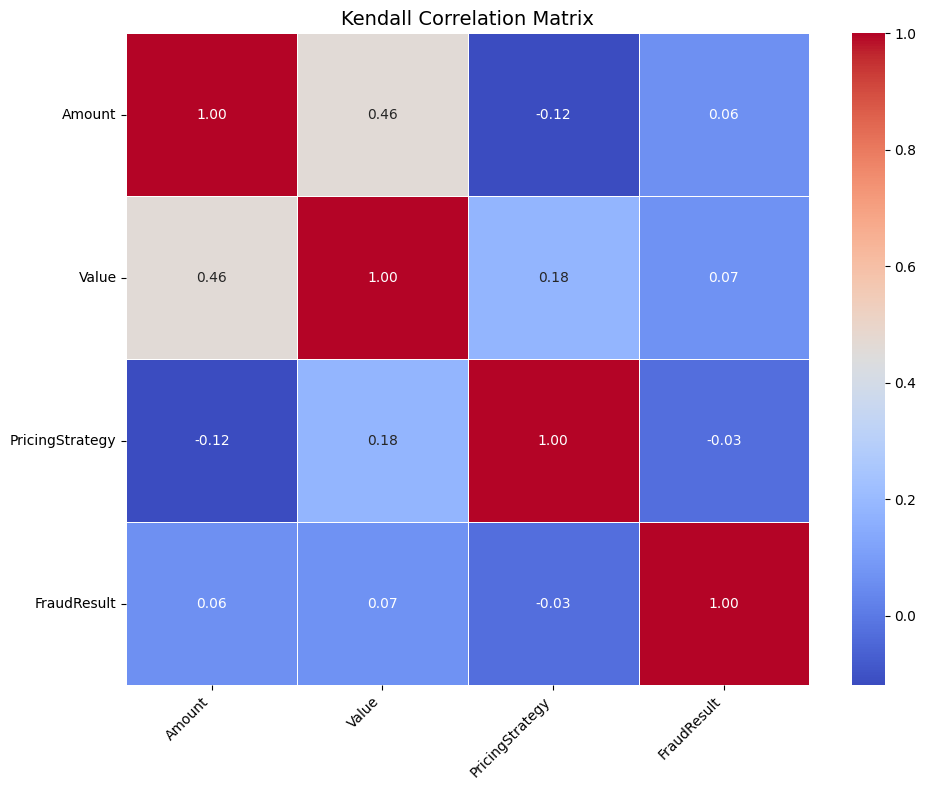


COMPARISON OF PEARSON, SPEARMAN, AND KENDALL CORRELATIONS


Pearson  Spearman  Kendall
Amount          Value               0.99      0.50     0.46
                PricingStrategy    -0.06     -0.14    -0.12
                FraudResult         0.56      0.07     0.06
Value           Amount              0.99      0.50     0.46
                PricingStrategy    -0.02      0.22     0.18
                FraudResult         0.57      0.08     0.07
PricingStrategy Amount             -0.06     -0.14    -0.12
                Value              -0.02      0.22     0.18
                FraudResult        -0.03     -0.03    -0.03
FraudResult     Amount              0.56      0.07     0.06
                Value               0.57      0.08     0.07
                PricingStrategy    -0.03     -0.03    -0.03

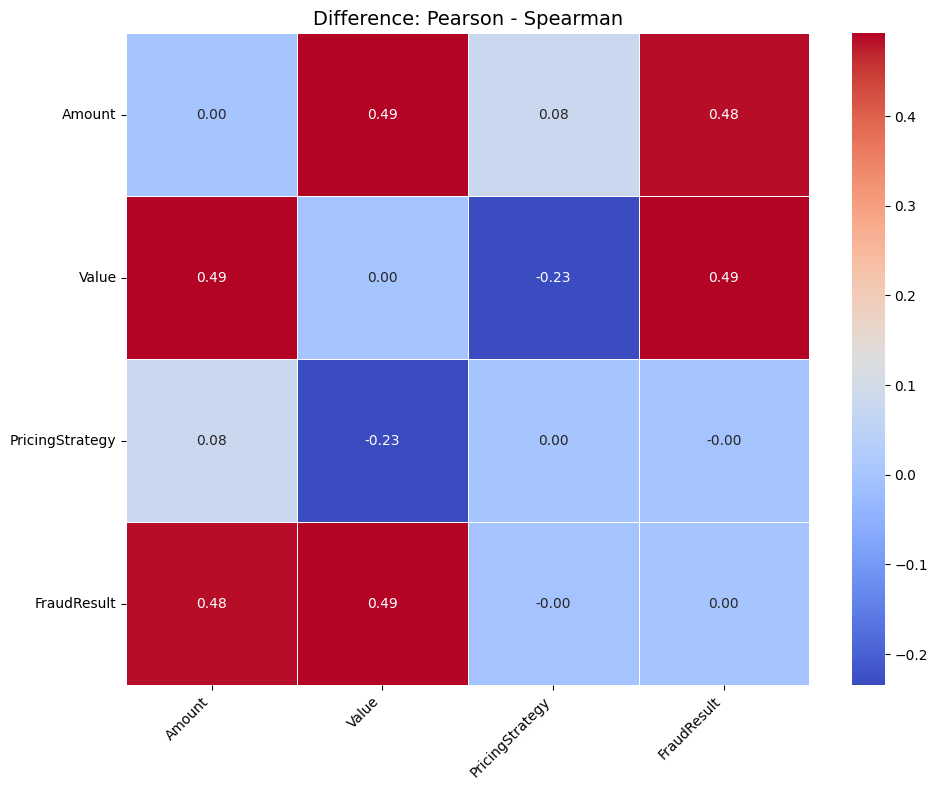

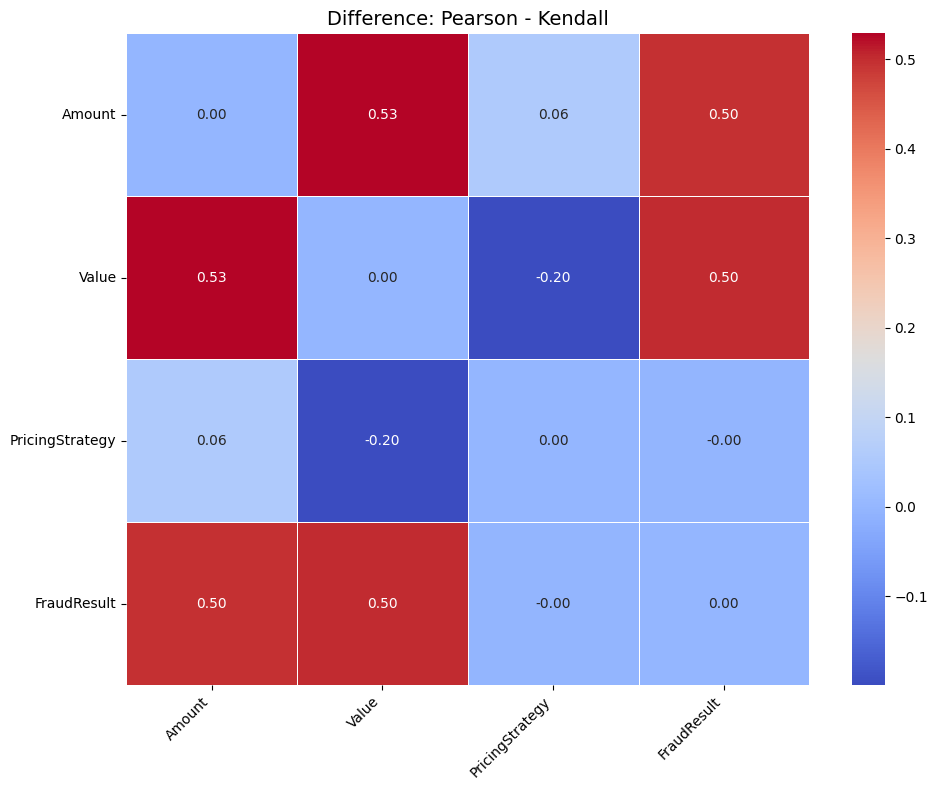

Some of the selected columns for pairplot are missing in the DataFrame.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['CountryCode'], errors='ignore')

# Compute correlation matrices
pearson_corr = numerical_df.corr(method='pearson')
spearman_corr = numerical_df.corr(method='spearman')
kendall_corr = numerical_df.corr(method='kendall')

# Function to plot heatmap
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot individual correlation matrices
plot_correlation_matrix(pearson_corr, 'Pearson Correlation Matrix')
plot_correlation_matrix(spearman_corr, 'Spearman Correlation Matrix')
plot_correlation_matrix(kendall_corr, 'Kendall Correlation Matrix')

# === Comparison Table ===
print("\n" + "="*80)
print("COMPARISON OF PEARSON, SPEARMAN, AND KENDALL CORRELATIONS")
print("="*80)

# Stack and concatenate correlations for comparison
pearson_flat = pearson_corr.stack().rename("Pearson")
spearman_flat = spearman_corr.stack().rename("Spearman")
kendall_flat = kendall_corr.stack().rename("Kendall")

# Combine into one DataFrame
corr_comparison = pd.concat([pearson_flat, spearman_flat, kendall_flat], axis=1)
# Drop self-correlations
corr_comparison = corr_comparison[corr_comparison.index.get_level_values(0) != corr_comparison.index.get_level_values(1)]

# Show comparison table
display(corr_comparison.round(2))

# === Optional: Visual comparison of differences ===
# Difference heatmap between Pearson and Spearman
diff_matrix = pearson_corr - spearman_corr
plot_correlation_matrix(diff_matrix, 'Difference: Pearson - Spearman')

# Difference heatmap between Pearson and Kendall
diff_matrix_kendall = pearson_corr - kendall_corr
plot_correlation_matrix(diff_matrix_kendall, 'Difference: Pearson - Kendall')

# Pairplot
selected_cols = ['Amount', 'TransactionHour', 'FraudResult']
if all(col in df.columns for col in selected_cols):
    sns.pairplot(df[selected_cols], 
                 hue='FraudResult', 
                 palette={0: 'blue', 1: 'red'}, 
                 plot_kws={'alpha': 0.3}, 
                 diag_kind='kde')
    plt.suptitle('Feature Relationships by Fraud Status', y=1.02)
    plt.show()
else:
    print("Some of the selected columns for pairplot are missing in the DataFrame.")


# 6. Identifying Missing Values
Identify missing values to determine missing data and decide on appropriate imputation strategies.



IDENTIFYING MISSING VALUES
Identify missing values to determine missing data and decide on appropriate imputation strategies.


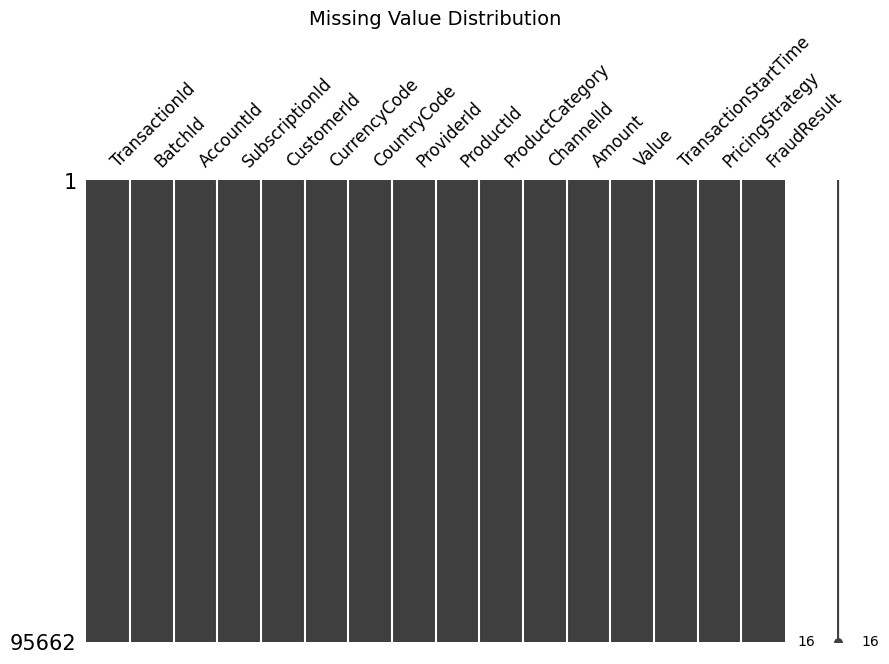

Total missing values in dataset: 0
Features with missing values (0): []


d:\EsH\week5\Credit-Risk-Probability-Model-for-Alternative-Data\env\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\EsH\week5\Credit-Risk-Probability-Model-for-Alternative-Data\env\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'TransactionId'),
  Text(0, 1.5, 'BatchId'),
  Text(0, 2.5, 'AccountId'),
  Text(0, 3.5, 'SubscriptionId'),
  Text(0, 4.5, 'CustomerId'),
  Text(0, 5.5, 'CurrencyCode'),
  Text(0, 6.5, 'CountryCode'),
  Text(0, 7.5, 'ProviderId'),
  Text(0, 8.5, 'ProductId'),
  Text(0, 9.5, 'ProductCategory'),
  Text(0, 10.5, 'ChannelId'),
  Text(0, 11.5, 'Amount'),
  Text(0, 12.5, 'Value'),
  Text(0, 13.5, 'TransactionStartTime'),
  Text(0, 14.5, 'PricingStrategy'),
  Text(0, 15.5, 'FraudResult')])

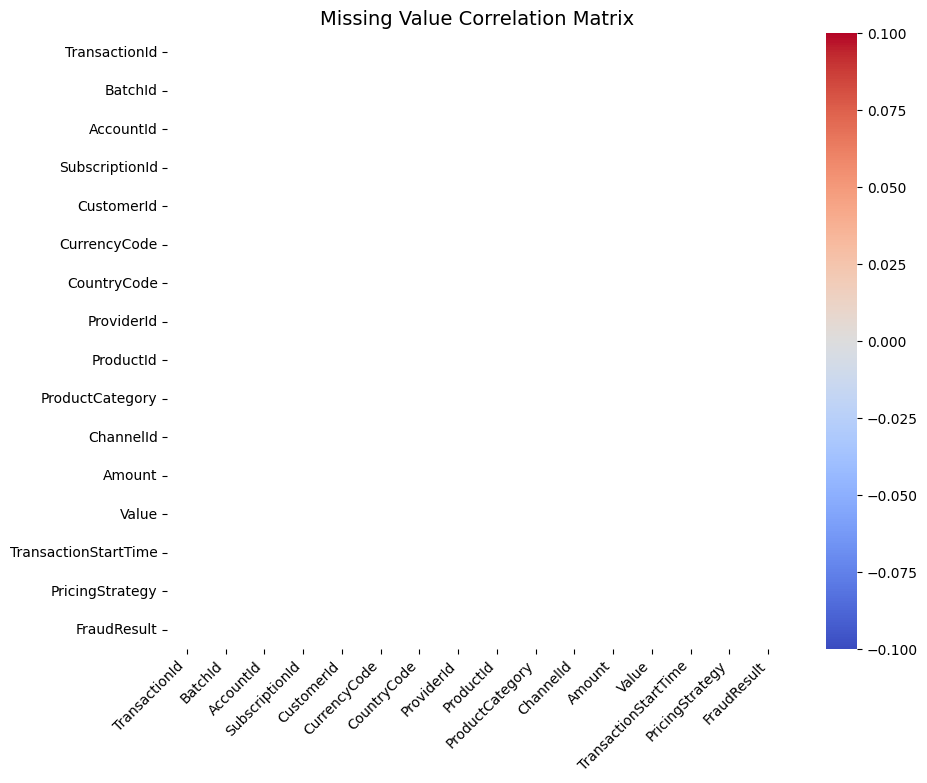

In [10]:
# If missingno is not installed, install it using pip
try:
    import missingno as msno
except ImportError:
    import sys
    !{sys.executable} -m pip install missingno
    import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

# Section title
print("\n" + "="*80)
print("IDENTIFYING MISSING VALUES")
print("Identify missing values to determine missing data and decide on appropriate imputation strategies.")
print("="*80)

# Visualize missing values matrix
msno.matrix(df, figsize=(10, 6), fontsize=12)
plt.title('Missing Value Distribution', fontsize=14)
plt.show()

# Summary statistics of missing values
total_missing = df.isna().sum().sum()
features_with_missing = df.columns[df.isna().any()].tolist()

print(f"Total missing values in dataset: {total_missing}")
print(f"Features with missing values ({len(features_with_missing)}): {features_with_missing}")

# Analyze missing value patterns by correlation
missing_corr = df.isnull().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Missing Value Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 7. Outlier Detection
Use box plots to identify outliers.


OUTLIER DETECTION USING BOXPLOT STATISTICS

Feature: Amount
Detected 603 outlier(s):
Outlier values: [-1000000.0, -900000.0, -500000.0, -200000.0, -160000.0, -150000.0, -115000.0, -110000.0, -100000.0, -90000.0, -85000.0, -75000.0, -70000.0, -60000.0, -55000.0, -50000.0, -40000.0, -37878.0, -35000.0, -33900.0, -31400.0, -30000.0, -28000.0, -26000.0, -25000.0, -24000.0, -21000.0, -20000.0, -18000.0, -15000.0, -14999.0, -14500.0, -14000.0, -13500.0, -13000.0, -12944.0, -12500.0, -12000.0, -11000.0, -10000.0, -9500.0, -9000.0, -8000.0, -7500.0, -7000.0, -6600.0, -6242.5, -6000.0, -5500.0, -5000.0, -4500.0, 7150.0, 7170.0, 7188.0, 7200.0, 7293.0, 7300.0, 7350.0, 7385.0, 7400.0, 7488.0, 7500.0, 7525.0, 7530.0, 7650.0, 7740.0, 7770.0, 7800.0, 7825.0, 7840.0, 7850.0, 7900.0, 8000.0, 8050.0, 8085.0, 8100.0, 8145.0, 8178.0, 8200.0, 8210.0, 8245.0, 8260.0, 8300.0, 8434.0, 8435.0, 8440.0, 8500.0, 8530.0, 8544.0, 8600.0, 8736.0, 8750.0, 8780.0, 8785.0, 8800.0, 8830.0, 8840.0, 8880.0, 8900.0, 9000

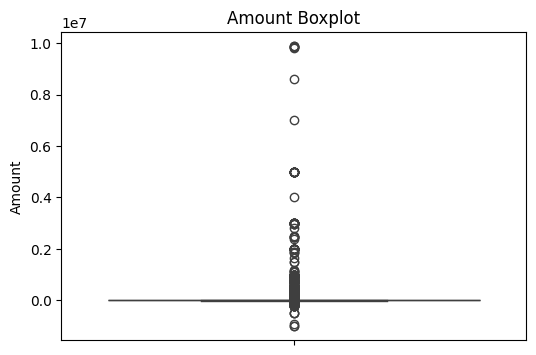


Feature: Value
Detected 492 outlier(s):
Outlier values: [12300.0, 12360.0, 12400.0, 12432.0, 12500.0, 12530.0, 12600.0, 12700.0, 12780.0, 12796.0, 12824.0, 12900.0, 12950.0, 13000.0, 13020.0, 13045.0, 13104.0, 13149.0, 13200.0, 13282.0, 13300.0, 13500.0, 13560.0, 13700.0, 13795.0, 13800.0, 13980.0, 14000.0, 14149.0, 14400.0, 14460.0, 14480.0, 14500.0, 14510.0, 14533.0, 14535.0, 14590.0, 14600.0, 14645.0, 14650.0, 14962.0, 14999.0, 15000.0, 15002.0, 15080.0, 15099.0, 15105.0, 15120.0, 15164.0, 15180.0, 15350.0, 15363.0, 15414.0, 15500.0, 15600.0, 15610.0, 15620.0, 15649.0, 15929.0, 16000.0, 16135.0, 16200.0, 16350.0, 16480.0, 16500.0, 16650.0, 16900.0, 17000.0, 17165.0, 17200.0, 17300.0, 17308.0, 17498.0, 17500.0, 17508.0, 17680.0, 17800.0, 18000.0, 18500.0, 18700.0, 18710.0, 18840.0, 19000.0, 19122.0, 19300.0, 19400.0, 19500.0, 19700.0, 19740.0, 19843.0, 19900.0, 19946.0, 20000.0, 20008.0, 20010.0, 20015.0, 20152.0, 20200.0, 20214.0, 20255.0, 20358.0, 20360.0, 20500.0, 20570.0, 20600.

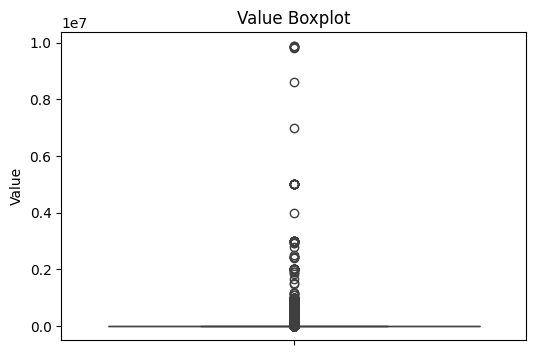


Feature: PricingStrategy
Detected 3 outlier(s):
Outlier values: [0.0, 1.0, 4.0]


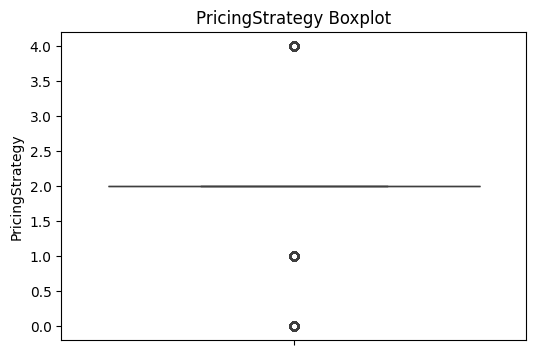


Feature: FraudResult
Detected 1 outlier(s):
Outlier values: [1.0]


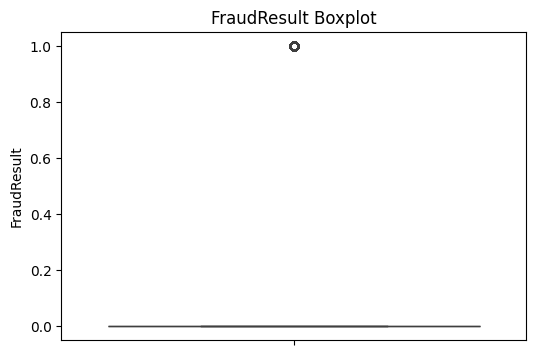

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns excluding 'CountryCode'
num_cols = df.select_dtypes(include=['number']).columns.drop('CountryCode', errors='ignore')

print("\n" + "="*80)
print("OUTLIER DETECTION USING BOXPLOT STATISTICS")
print("="*80)

for col in num_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    box = sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'{col} Boxplot')

    # Get outliers from boxplot stats
    # Matplotlib's boxplot stats are not directly exposed by seaborn, so:
    # Use matplotlib's Axes artists to extract outliers:
    # Outliers are plotted as 'Line2D' objects with marker style 'o' (dots)
    outliers = []
    for line in ax.lines:
        # line properties: get marker data points
        if line.get_marker() == 'o':
            ydata = line.get_ydata()
            outliers.extend(ydata)

    outliers = sorted(set(outliers))

    if outliers:
        print(f"\nFeature: {col}")
        print(f"Detected {len(outliers)} outlier(s):")
        print(f"Outlier values: {outliers}")
    else:
        print(f"\nFeature: {col}")
        print("No outliers detected by boxplot.")

    plt.show()


# Insights

In [12]:
# === EDA Insights Summary ===

print("\n" + "="*80)
print("SUMMARY OF EDA INSIGHTS")
print("="*80)

# 1. Numerical Feature Insights
print("\nNumerical Feature Insights:")
for col in num_cols:
    median = df[col].median()
    mean = df[col].mean()
    skew = df[col].skew()
    missing = df[col].isna().sum()
    print(f"- {col}: mean={mean:.2f}, median={median:.2f}, skewness={skew:.2f}, missing={missing}")

# 2. Categorical Feature Insights
print("\nCategorical Feature Insights:")
for col in df.select_dtypes(exclude=[np.number, 'datetime']).columns:
    top_cat = df[col].mode().iloc[0]
    top_cat_pct = df[col].value_counts(normalize=True, dropna=False).iloc[0] * 100
    n_unique = df[col].nunique()
    missing = df[col].isna().sum()
    print(f"- {col}: {n_unique} unique, most common='{top_cat}' ({top_cat_pct:.1f}%), missing={missing}")

# 3. Missing Values
print("\nMissing Value Insights:")
print(f"- Total missing values: {total_missing}")
if features_with_missing:
    print(f"- Features with missing values: {features_with_missing}")
else:
    print("- No missing values detected.")

# 4. Outlier Detection
print("\nOutlier Detection (Boxplot Method):")
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"- {col}: {n_outliers} outliers detected")

# 5. Correlation Insights
print("\nCorrelation Insights (Pearson):")
corrs = df[num_cols].corr()
high_corr = []
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        c = corrs.iloc[i, j]
        if abs(c) > 0.7 and abs(c) < 1:
            high_corr.append((num_cols[i], num_cols[j], c))
if high_corr:
    for a, b, c in high_corr:
        print(f"- High correlation between {a} and {b}: {c:.2f}")
else:
    print("- No strong correlations (>0.7) between numerical features.")

print("\n" + "="*80)


SUMMARY OF EDA INSIGHTS

Numerical Feature Insights:
- Amount: mean=6717.85, median=1000.00, skewness=51.10, missing=0
- Value: mean=9900.58, median=1000.00, skewness=51.29, missing=0
- PricingStrategy: mean=2.26, median=2.00, skewness=1.66, missing=0
- FraudResult: mean=0.00, median=0.00, skewness=22.20, missing=0

Categorical Feature Insights:
- TransactionId: 95662 unique, most common='TransactionId_1' (0.0%), missing=0
- BatchId: 94809 unique, most common='BatchId_67019' (0.0%), missing=0
- AccountId: 3633 unique, most common='AccountId_4841' (32.3%), missing=0
- SubscriptionId: 3627 unique, most common='SubscriptionId_3829' (34.1%), missing=0
- CustomerId: 3742 unique, most common='CustomerId_7343' (4.3%), missing=0
- CurrencyCode: 1 unique, most common='UGX' (100.0%), missing=0
- ProviderId: 6 unique, most common='ProviderId_4' (39.9%), missing=0
- ProductId: 23 unique, most common='ProductId_6' (34.1%), missing=0
- ProductCategory: 9 unique, most common='financial_services' (47

# Save cleaned Data
Clean missing and outliers and save for further processing

In [14]:
# Save cleaned data for further processing (removing missing values and outliers)

# 1. Remove rows with any missing values
df_clean = df.dropna().copy()

# 2. Remove outliers from numerical columns using the IQR method
for col in df_clean.select_dtypes(include='number').columns:
    if col == 'CountryCode':
        continue
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# 3. Save the cleaned DataFrame to a new CSV file
df_clean.to_csv("../data/processed/cleaned_data.csv", index=False)
print(f"Cleaned data saved to ../data/processed/cleaned_data.csv. Shape: {df_clean.shape}")

Cleaned data saved to ../data/processed/cleaned_data.csv. Shape: (57283, 16)
